In [ ]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

In [4]:
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
import keras

In [10]:
def load_image(path: str):
    img = image.load_img(path)
    img = image.img_to_array(img) / 255.0
    return img

In [14]:
model = keras.models.load_model('CSRNet.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (1, 768, 1024, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (1, 768, 1024, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (1, 384, 512, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (1, 384, 512, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (1, 384, 512, 128)     │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (1, 192, 256, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (1, 192, 256, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (1, 192, 256, 256)     │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (1, 192, 256, 256)     │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (1, 96, 128, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (1, 96, 128, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (1, 96, 128, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (1, 96, 128, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (1, 96, 128, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (1, 96, 128, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (1, 96, 128, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (1, 96, 128, 256)      │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (1, 96, 128, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (1, 96, 128, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (1, 96, 128, 1)        │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,263,489 (62.04 MB)

 Trainable params: 16,263,489 (62.04 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
Density map shape: (96, 128)
16.149298


Text(0.5, 1.0, 'Predicted Density Map')

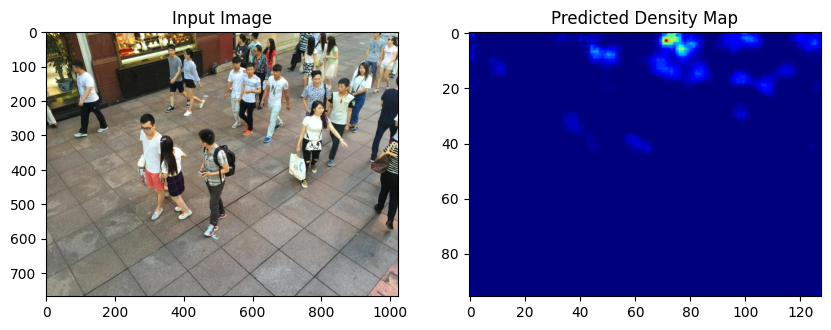

In [15]:
input_image_path= "input.jpg"
preprocessed_image = load_image(input_image_path)
input_image = np.expand_dims(preprocessed_image, axis=0)

density_map = model.predict(input_image)
density_map = np.squeeze(density_map, axis=0)
density_map = np.squeeze(density_map, axis=-1)

print("Density map shape:", density_map.shape)

count = np.sum(density_map)
print(count)
# factor = 10 if count > 5 else count * 2
# count += factor 

# Display the input image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(preprocessed_image)  # Assuming the batch size is 1
plt.title("Input Image")

# Display the predicted density map
plt.subplot(1, 2, 2)
plt.imshow(np.clip((density_map), 0, None), cmap='jet')  # Assuming single-channel output
plt.title("Predicted Density Map")